In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

In [2]:
data=pd.read_csv('상장비상장(2008_2013).csv',header=None,skiprows=1)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0,2008.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-11.65,20.34,-30.27,-21.90,8.00,139.78,10.45,56.11,0.95,1.0
1,1,2008.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-14.83,73.84,-97.78,-21.95,1.58,9.40,1.91,33.43,1.06,1.0
2,2,2008.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-4.54,76.52,7.41,1.27,7.95,71.48,2.81,27.10,5.53,1.0
3,3,2008.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.66,-6.21,-1.56,5.31,9.83,-481.27,-31.27,9.51,2.95,1.0
4,4,2008.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,6.50,57.73,93.40,161.09,26.41,380.09,10.21,36.98,6.16,1.0


In [4]:
data.shape

(6246, 38)

In [5]:
input = data.iloc[:,2:37].values
output = data.iloc[:,[37]].values 

In [6]:
# We are controlling the seed to compare different models
seed = 42
tf.set_random_seed(seed)
np.random.seed(seed)

In [7]:
# For the training and validation sets we used 2008 to 2012 data as training sets and 2013 data as validation sets.
# The reason for not doing it random is because we are interested in how the data we have can predict the future
train_indices = []
test_indices = []

for index,element in data.iterrows():
    if element[1] == 2013:
        test_indices.append(index)
    else:
        train_indices.append(index)
        
train_indices=np.array(train_indices)
train_indices=np.int_(train_indices)
test_indices=np.array(test_indices)
test_indices=np.int_(test_indices)

input_train = input[train_indices]
input_test = input[test_indices]
output_train = output[train_indices]
output_test = output[test_indices] 

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(input_train)
input_train = scaler.transform(input_train)
input_test = scaler.transform(input_test)

In [9]:
print('Before OverSampling, the shape of input_train: {}'.format(input_train.shape))
print('Before OverSampling, the shape of output_train: {} \n'.format(output_train.shape))

print("Before OverSampling, counts of label '1': {}".format(sum(output_train==1)))
print("Before OverSampling, counts of label '0': {}".format(sum(output_train==0)))

Before OverSampling, the shape of input_train: (5205, 35)
Before OverSampling, the shape of output_train: (5205, 1) 

Before OverSampling, counts of label '1': [222]
Before OverSampling, counts of label '0': [4983]


In [10]:
# In order to solve the data imbalance problem we used the oversampling method.
sm = SMOTE(ratio='auto', kind='regular')
input_train, output_train = sm.fit_sample(input_train,list(output_train))

C:\Users\youngjae.kim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
# The following are some under sampling methods

#from imblearn.under_sampling import TomekLinks
#tl = TomekLinks(return_indices=True, ratio='majority')
#input_train, output_train, id_tl = tl.fit_sample(input_train, output_train)

#from imblearn.under_sampling import ClusterCentroids
#cc = ClusterCentroids(ratio={0: 300})
#input_train, output_train = cc.fit_sample(input_train, output_train)

In [12]:
print('After OverSampling, the shape of input_train: {}'.format(input_train.shape))
print('After OverSampling, the shape of output_train: {} \n'.format(output_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(output_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(output_train==0)))

After OverSampling, the shape of input_train: (9966, 35)
After OverSampling, the shape of output_train: (9966,) 

After OverSampling, counts of label '1': 4983
After OverSampling, counts of label '0': 4983


In [13]:
epoch_size= 1500
batch_size= 2048
hidden_size1=2
hidden_size2=8
result=1
n=input_train[0].size
m=output_train.shape[0]

In [14]:
output_train = np.array(output_train).reshape(m,1)

In [15]:
X = tf.placeholder(shape=[None, n], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [16]:
initializer = tf.contrib.layers.variance_scaling_initializer()

w1 = tf.Variable(initializer(shape=[n, hidden_size1]))
b1 = tf.Variable(initializer(shape=[hidden_size1]))
#w2 = tf.Variable(initializer(shape=[hidden_size1,result]))
#b2 = tf.Variable(initializer(shape=[result]))
w2 = tf.Variable(initializer(shape=[hidden_size1,hidden_size2]))
b2 = tf.Variable(initializer(shape=[hidden_size2]))
w3 = tf.Variable(initializer(shape=[hidden_size2, result]))
b3 = tf.Variable(initializer(shape=[result]))

W0916 05:40:28.599570 10428 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [17]:
hidden1 = tf.nn.relu(tf.add(tf.matmul(X, w1), b1))
hidden2 = tf.nn.relu(tf.add(tf.matmul(hidden1, w2), b2))
#final = tf.add(tf.matmul(hidden1, w2), b2)
final = tf.add(tf.matmul(hidden2, w3), b3)

In [18]:
#since it is more important to find companies that has dept we set an extra weight on these companies
loss = tf.reduce_mean(tf.nn.weighted_cross_entropy_with_logits(logits=final,labels=Y,pos_weight=1.4))
global_step = tf.Variable(0, trainable=False)
starter_learning_rate = 0.01
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,epoch_size, 0.99, staircase=True)
train_step = (
    tf.train.AdamOptimizer(learning_rate)
    .minimize(loss, global_step=global_step)
)

In [19]:
prediction = tf.round(tf.sigmoid(final))
correct = tf.cast(tf.equal(prediction, Y), dtype=tf.float32)
accuracy = tf.reduce_mean(correct)

In [20]:
sess=tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [21]:
train_loss = []
test_loss = []
train_accu= []
test_accu=[]

for i in range(epoch_size):
    rand_index = np.random.choice(len(input_train), size=batch_size)
    rand_x = input_train[rand_index]
    rand_y = output_train[rand_index]
    
    sess.run(train_step, feed_dict={X: rand_x, Y: rand_y})
    
    loss1 = sess.run(loss, feed_dict={X: rand_x, Y: rand_y})
    train_loss.append(loss1)
    
    accu1 = sess.run(accuracy, feed_dict={X: rand_x, Y: output_train[rand_index]})
    train_accu.append(accu1)
    
    loss2 = sess.run(loss, feed_dict={X: input_test, Y: output_test})
    test_loss.append(loss2)
    
    accu2 = sess.run(accuracy, feed_dict={X: input_test, Y: output_test})
    test_accu.append(np.sqrt(accu2))
    
    if (i+1)%100==0:
        print('Generation: ' + str(i+1) + '. Train Loss = ' + str(loss1)+ '. Test Loss = ' + str(loss2) + 
              '. Train Accuracy = ' + str(accu1) + '. Test Accuracy = ' + str(accu2))
        
print('Final Train Accuracy: ' + str(accu1))
print('Final Test Accuracy: ' + str(accu2))  

Generation: 100. Train Loss = 0.6200199. Test Loss = 0.94749624. Train Accuracy = 0.7373047. Test Accuracy = 0.73775214
Generation: 200. Train Loss = 0.5867667. Test Loss = 1.1366392. Train Accuracy = 0.7504883. Test Accuracy = 0.7223823
Generation: 300. Train Loss = 0.5413716. Test Loss = 1.602864. Train Accuracy = 0.77783203. Test Accuracy = 0.70989436
Generation: 400. Train Loss = 0.5258043. Test Loss = 2.286514. Train Accuracy = 0.77441406. Test Accuracy = 0.7060519
Generation: 500. Train Loss = 0.5062187. Test Loss = 2.814145. Train Accuracy = 0.7944336. Test Accuracy = 0.71757925
Generation: 600. Train Loss = 0.50036657. Test Loss = 3.2006457. Train Accuracy = 0.7919922. Test Accuracy = 0.7012488
Generation: 700. Train Loss = 0.49122703. Test Loss = 3.8137467. Train Accuracy = 0.7895508. Test Accuracy = 0.685879
Generation: 800. Train Loss = 0.52316594. Test Loss = 4.304284. Train Accuracy = 0.7788086. Test Accuracy = 0.6820365
Generation: 900. Train Loss = 0.49820358. Test Loss 

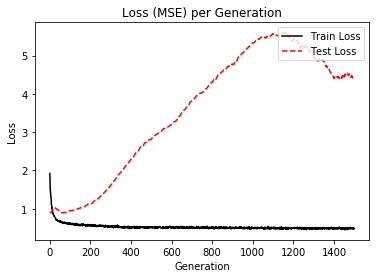

In [22]:
# The plot of the test accuracy goes down since instead of find the optimal accuracy point we are finding a model that can predict
# Companies that will fail to cover their dept
plt.plot(train_loss, 'k-', label='Train Loss')
plt.plot(test_loss, 'r--', label='Test Loss')
plt.title('Loss (MSE) per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [23]:
pred = sess.run(prediction, feed_dict={X: input})

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [25]:
target_names = ['false', 'true']

In [26]:
pred_train = sess.run(prediction, feed_dict={X: input_train})
print(confusion_matrix(output_train.flatten(), pred_train))
print(classification_report(output_train.flatten(), pred_train, target_names=target_names))
precision_score(output_train.flatten(), pred_train, average='micro',pos_label=1)
recall_score(output_train.flatten(), pred_train, average='micro',pos_label=1)

[[3467 1516]
 [ 460 4523]]
             precision    recall  f1-score   support

      false       0.88      0.70      0.78      4983
       true       0.75      0.91      0.82      4983

avg / total       0.82      0.80      0.80      9966



0.8017258679510335

In [27]:
# The most value we are interested in is the value of recall for 'true' So for this cas 0.82 is the critical number
# So in this case out of the 49 companies that become bankrupt 40 of them we were able to track down.
pred_test = sess.run(prediction, feed_dict={X: input_test})
print(confusion_matrix(output_test.flatten(), pred_test))
print(classification_report(output_test.flatten(), pred_test, target_names=target_names))
precision_score(output_test.flatten(), pred_test, average='micro',pos_label=1)
recall_score(output_test.flatten(), pred_test, average='micro',pos_label=1)

[[661 331]
 [  9  40]]
             precision    recall  f1-score   support

      false       0.99      0.67      0.80       992
       true       0.11      0.82      0.19        49

avg / total       0.95      0.67      0.77      1041



0.6733909702209414

In [28]:
from sklearn import metrics
import matplotlib.pyplot as plt 

In [29]:
pred_test = sess.run(final, feed_dict={X: input_test})

In [30]:
fpr, tpr, thresholds = metrics.roc_curve(output_test, pred_test)
roc_auc = metrics.auc(fpr, tpr)

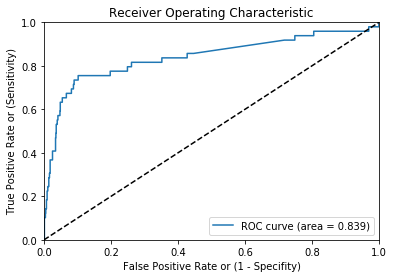

In [31]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [32]:
hidden = sess.run(hidden1, feed_dict={X: input_train})

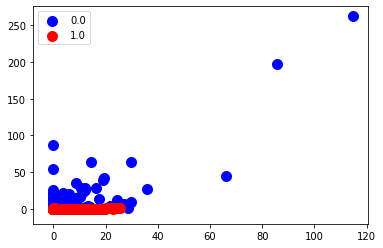

In [33]:
from matplotlib import pyplot as plt

scatter_x = hidden[:,0]
scatter_y = hidden[:,1]
group = output_train.flatten()
cdict = {0:'blue',1:'red'}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 100)
ax.legend()
plt.show()